## Author : Rahul Singh Shekhawat

### Task 1 : Prediction using Decision Tree Algorithm
### GRIP @ The Sparks Foundation

Decision Trees are supervised Machine Learning algorithms that can perform
both classification and regression tasks. For the given ‘Iris’ dataset, I created the Decision Tree classifier and visualized it
graphically. The aim of this project is if we feed any new data to this classifier, it would be able to
predict the right plant class.


### Libraries Used  : Numpy, Pandas , Scikit-learn, Seaborn, Matplotlib, Pydot


In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.metrics import accuracy_score


import seaborn as sns

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image


## Step 1 - Loading the Dataset

In [2]:
# Loading Dataset
iris = load_iris()

In [3]:
#Have a look at the dataset
#X.head()

In [4]:
#Divide in depedent and indepedent features
X=iris.data[:,:] 
y=iris.target

## Step 2 - Exploratory Data Analysis

In [5]:
#Input data 

df = pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])

df.head()


,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.shape

(150, 5)

In [11]:
df.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Step 3 - Data Visualization

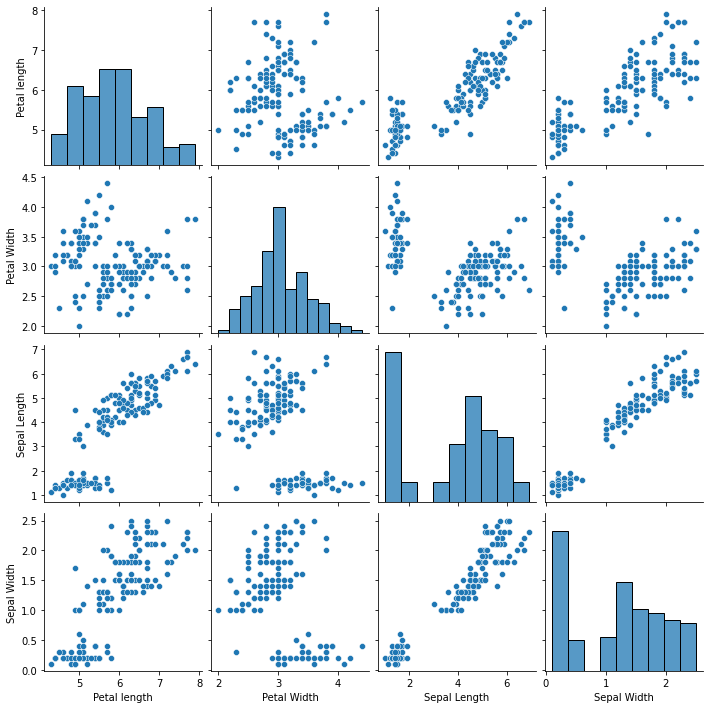

In [12]:
# Input data Visualization
# Creating a pairplot with seaborn
sns.pairplot(df)

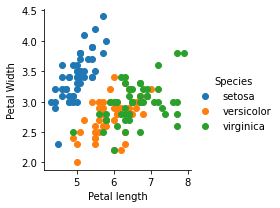

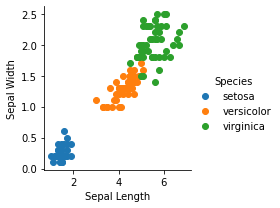

In [13]:
# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()


## Step 4 - Decision Tree Model Training

In [14]:
#Train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [15]:
#initialize the model
dtree = DecisionTreeClassifier()

In [16]:
# Model fitting/Training
dtree.fit(X_train,y_train)
print("Model is now trained")
y_pred = dtree.predict(X_test)


Model is now trained


## Step 6 - Visualizing the Trained Model

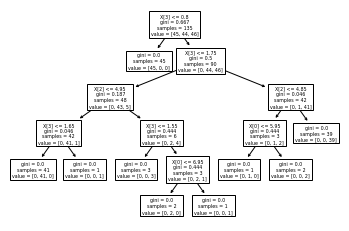

In [17]:
# basic tree visualization
from sklearn import tree
tree.plot_tree(dtree);

In [18]:
# Advance Tree Visualization

tree.export_graphviz(dtree,
                     out_file="tree.dot",
                     feature_names = iris.feature_names[:], 
                     class_names=iris.target_names,
                     filled = True)

import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('ddtree.png')


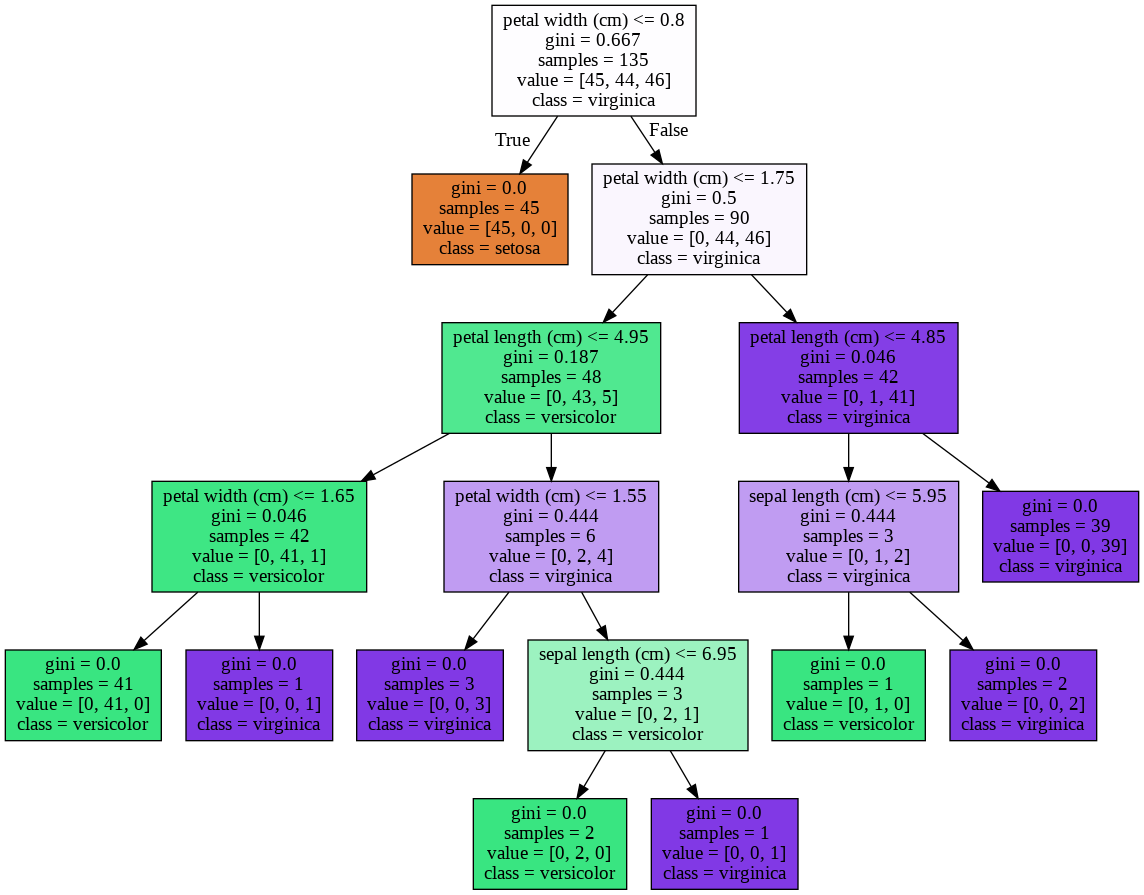

In [20]:
Image(filename='ddtree.png')  

## Step 7 - Predicting the class output for some random values based on our trained model

In [21]:
print("All Classes = ",iris.target_names)

# Estimating class belongings
print()
print("Predicting for\nPetals length & width = [5.6cm, 2.4cm] and sepal length & width = [ 2.3cm, 0.4cm] . ")
print()
print('Output = ',dtree.predict([[5.6, 2.4, 2.3, 0.4]]))
print()
print("And class 0 means -  setosa.")

All Classes =  ['setosa' 'versicolor' 'virginica']

Predicting for
Petals length & width = [5.6cm, 2.4cm] and sepal length & width = [ 2.3cm, 0.4cm] . 

Output =  [0]

And class 0 means -  setosa.


## Step 8 - Model accuracy

In [23]:
# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


The model is giving 100% accuracy because of taking all 4 features of the iris dataset for model building.

## Conclusion
### I successfully build a decision tree model that can classify plant classes based on given features, i've also visualized the model graphically and evaluated the model based on accuracy score.
## Thank You